In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [161]:
data = pd.read_csv('BGEM_extra_phenotypes.csv')

In [91]:
data.dtypes

Plot                    int64
Row                     int64
Ran.                    int64
Leaf Length 1         float64
Leaf Width 1          float64
Leaf Length 2         float64
Leaf Width 2          float64
Ear Height 1          float64
Flag Leaf Height 1    float64
Plant Height 1        float64
Ear Height 2          float64
Flag Leaf Height 2    float64
Plant Height 2        float64
Yang Field Notes       object
Inbred or Hybrid?      object
Data missing?          object
dtype: object

In [137]:
data.columns

Index(['Plot', 'Row', 'Ran.', 'Leaf Length 1', 'Leaf Width 1', 'Leaf Length 2',
       'Leaf Width 2', 'Ear Height 1', 'Flag Leaf Height 1', 'Plant Height 1',
       'Ear Height 2', 'Flag Leaf Height 2', 'Plant Height 2',
       'Yang Field Notes', 'Inbred or Hybrid?', 'Data missing?'],
      dtype='object')

<AxesSubplot:>

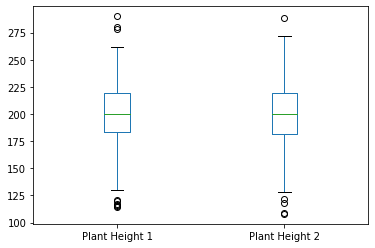

In [126]:
data.iloc[:, [9,12]].plot(kind='box')


In [82]:
#defining a function to remove the outliers
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1=datacolumn.quantile(0.25)
 Q3=datacolumn.quantile(0.75)
 #Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (2.0 * IQR)
 upper_range = Q3 + (2.0 * IQR)
 return lower_range,upper_range

In [124]:
trait = 'Plant Height 2'

In [125]:
#Outlier treatment
outlier_treatment(data[trait])
lowerbound,upperbound = outlier_treatment(data[trait])
rm_index =data[(data[trait] < lowerbound) | (data[trait] > upperbound)].index
rm_index.size
data.at[rm_index, trait] = np.nan

In [138]:
data.rename(columns={'Plot' : 'PLOT ID'}, inplace= True)

In [128]:
genolabs = pd.read_csv('Raw_spectrum_merged')

In [134]:
genolabs.columns[4:16]

Index(['PLOT ID', 'rows', 'ranges', 'Block', 'Rep', 'Group', 'Trt', 'year',
       'genotype', 'note', 'Calibration', 'ASD'],
      dtype='object')

In [135]:
genolabs = genolabs.loc[:, ['PLOT ID', 'rows', 'ranges', 'Block', 'Rep', 'Group', 'Trt', 'year',
       'genotype', 'note', 'Calibration', 'ASD']]

In [139]:
merged1 = pd.merge(genolabs, data , how= 'right')

In [140]:
leaf_length = merged1[['Leaf Length 1', 'Leaf Length 2']].mean(axis=1)

In [141]:
leaf_width = merged1[['Leaf Width 1', 'Leaf Width 2']].mean(axis=1)

In [142]:
ear_height = merged1[['Ear Height 1', 'Ear Height 2']].mean(axis=1)

In [143]:
flag_leaf = merged1[['Flag Leaf Height 1', 'Flag Leaf Height 2']].mean(axis=1)

In [144]:
plant_height = merged1[['Plant Height 1', 'Plant Height 2']].mean(axis=1)

In [145]:
merged1.insert(12 , 'plant_height', plant_height)

In [146]:
merged1.insert(12 , 'flag_leaf', flag_leaf)

In [147]:
merged1.insert(12 , 'ear_height', ear_height)

In [148]:
merged1.insert(12 , 'leaf_width', leaf_width)

In [149]:
merged1.insert(12 , 'leaf_length', leaf_length)

In [156]:
merged1.to_csv('BGEM_extra_phenotypes.csv')

<AxesSubplot:>

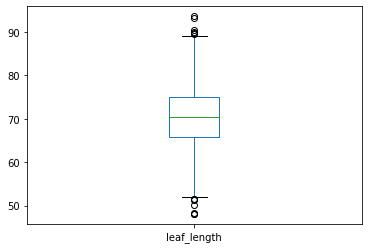

In [155]:
merged1.loc[:, 'leaf_length'].plot(kind='box')

In [164]:
data.loc[data['Block'] == 4 , ['leaf_length',
       'leaf_width', 'ear_height', 'flag_leaf', 'plant_height']] = np.nan

In [163]:
data.columns

Index(['Unnamed: 0', 'PLOT ID', 'rows', 'ranges', 'Block', 'Rep', 'Group',
       'Trt', 'year', 'genotype', 'note', 'Calibration', 'ASD', 'leaf_length',
       'leaf_width', 'ear_height', 'flag_leaf', 'plant_height', 'Row', 'Ran.',
       'Leaf Length 1', 'Leaf Width 1', 'Leaf Length 2', 'Leaf Width 2',
       'Ear Height 1', 'Flag Leaf Height 1', 'Plant Height 1', 'Ear Height 2',
       'Flag Leaf Height 2', 'Plant Height 2', 'Yang Field Notes',
       'Inbred or Hybrid?', 'Data missing?'],
      dtype='object')

In [168]:
data.

,leaf_length,leaf_width,ear_height,flag_leaf
1350,NaN,NaN,NaN,NaN
1351,NaN,NaN,NaN,NaN
1352,NaN,NaN,NaN,NaN
1353,NaN,NaN,NaN,NaN
1354,NaN,NaN,NaN,NaN
1355,NaN,NaN,NaN,NaN
1356,NaN,NaN,NaN,NaN
1357,NaN,NaN,NaN,NaN
1358,NaN,NaN,NaN,NaN
1359,NaN,NaN,NaN,NaN


#  # insert GWAS ids for BLUPs

In [201]:
import pandas as pd
ids = pd.read_csv('BGEM_WGS_Labels.csv')
ids = ids.loc[: , ['UID', 'Genotype']]
ids.rename(columns={'Genotype' : 'genotype'}, inplace=True)

In [202]:
pheno_blups = pd.read_csv('extra_pheno_blups.csv')

In [203]:
pheno_blups = pheno_blups.loc[pheno_blups['Rep'] == 1 , :]

In [204]:
GWAS_labels = pd.read_csv('WGS_labels_only.csv')
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')

In [205]:
pheno_HN = pheno_blups.loc[pheno_blups['Trt'] == 'HN' , :]
pheno_LN = pheno_blups.loc[pheno_blups['Trt'] ==  'LN', :]

In [206]:
merged_HN = pd.merge(ids, pheno_HN, how = 'left')
merged_LN = pd.merge(ids, pheno_LN, how = 'left')

In [207]:
pheno_HN2= pd.merge(GWAS_labels, merged_HN, how='left')
pheno_LN2= pd.merge(GWAS_labels, merged_LN, how='left')

In [208]:
merged_last = pd.concat([pheno_HN2, pheno_LN2], axis= 0)

In [209]:
merged_last.to_csv('pheno_extra_blups_for_GWAS.csv', index= False)

In [210]:
pheno_blups_LN = merged_last.loc[merged_last['Trt'] == 'LN', ['UID', 'leaf_length', 'leaf_width', 'ear_height', 
                                                              'flag_leaf', 'plant_height']]
pheno_blups_HN = merged_last.loc[merged_last['Trt'] == 'HN', ['UID', 'leaf_length', 'leaf_width', 'ear_height', 
                                                              'flag_leaf', 'plant_height']]

In [211]:
pheno_blups_LN.to_csv('pheno_extra_blups_LN.csv', index=False)
pheno_blups_HN.to_csv('pheno_extra_blups_HN.csv', index=False)

In [ ]:
def uncommon_items(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    if(set1 ^ set2):
        print('Uncommon elements: ' + str(set1 ^ set2))
    else:
        print('No Uncommon elements')

uncommon_items(list1, list2)

In [ ]:
    set1 = set(list1)
    set2 = set(list2)
(set1 ^ set2)

# Insert GWAS Ids for extra Pheno Blues

In [212]:
import pandas as pd
ids = pd.read_csv('BGEM_WGS_Labels.csv')
ids = ids.loc[: , ['UID', 'Genotype']]
ids.rename(columns={'Genotype' : 'genotype'}, inplace=True)

In [213]:
pheno_blues = pd.read_csv('extra_pheno_blues.csv')

In [214]:
GWAS_labels = pd.read_csv('WGS_labels_only.csv')
GWAS_labels.rename(columns={'UID                     ': 'UID'}, inplace=True)
GWAS_labels['UID'] = GWAS_labels['UID'].str.replace(' ' , '')

In [215]:
pheno_HN = pheno_blues.loc[pheno_blues['Trt'] == 'HN' , :]
pheno_LN = pheno_blues.loc[pheno_blues['Trt'] ==  'LN', :]

In [216]:
merged_HN = pd.merge(ids, pheno_HN, how = 'left')
merged_LN = pd.merge(ids, pheno_LN, how = 'left')

In [217]:
pheno_HN2= pd.merge(GWAS_labels, merged_HN, how='left')
pheno_LN2= pd.merge(GWAS_labels, merged_LN, how='left')

In [218]:
merged_last = pd.concat([pheno_HN2, pheno_LN2], axis= 0)

In [219]:
merged_last.to_csv('pheno_extra_blues_for_GWAS.csv', index= False)

In [220]:
pheno_blues_LN = merged_last.loc[merged_last['Trt'] == 'LN', ['UID', 'leaf_length', 'leaf_width', 'ear_height', 
                                                              'flag_leaf', 'plant_height']]
pheno_blues_HN = merged_last.loc[merged_last['Trt'] == 'HN', ['UID', 'leaf_length', 'leaf_width', 'ear_height', 
                                                              'flag_leaf', 'plant_height']]

In [221]:
pheno_blues_LN.to_csv('pheno_extra_blues_LN.csv', index=False)
pheno_blues_HN.to_csv('pheno_extra_blues_HN.csv', index=False)